In [1032]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from random import randrange, choice

In [10]:
reg_data = pd.read_csv('moloco_regression.csv', header=None, names=['A', "B", "C"])

In [1457]:
reg_data.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [1458]:
y=reg_data['C'].values
X=reg_data[['A', "B"]].values

In [1459]:
x1= X[:,0]
x2=X[:,1]

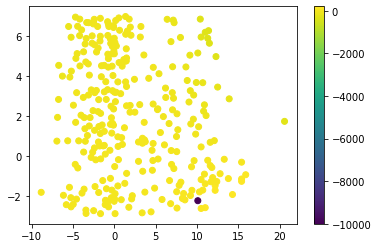

In [1460]:
## 2D scatter plot
fig, ax = plt.subplots()
scat = ax.scatter(x1, x2, c=y, marker='o')
fig.colorbar(scat)

plt.show();

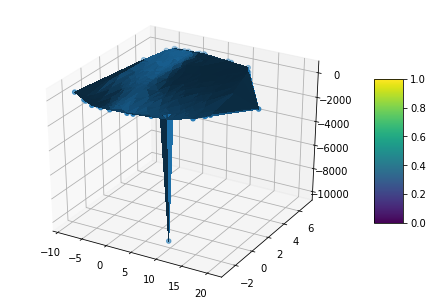

In [1461]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1,x2,y)

# Plot the surface.
surf = ax.plot_trisurf(x1,x2,y, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

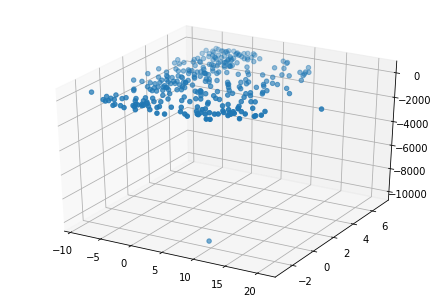

In [1462]:
#  3D scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1,x2,y)
plt.show()

Discussion: there is an outlier in the data. Let's find it and plot without it.


In [1463]:
reg_data.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


In [1464]:
reg_data.quantile([0.01,0.99], axis=0)

,A,B,C
0.01,-6.7612,-2.8503,-288.01
0.99,15.4000,6.9102,155.09


In [1465]:
no_outlier_data = reg_data[(reg_data['C']>=-288.01)&(reg_data['C']<=155.09) ]

In [1466]:
no_outlier_data.describe()

,A,B,C
count,294.000000,294.000000,294.000000
mean,2.115316,2.038995,-8.151278
std,5.566152,2.971380,65.029780
min,-8.860000,-2.890000,-288.000000
25%,-1.977500,-0.536750,-22.775000
50%,0.420500,1.960000,-3.090000
75%,6.840000,4.672500,15.875000
max,20.600000,7.000000,155.000000


In [1467]:
# Remove outliers
y=no_outlier_data['C'].values
X=no_outlier_data[['A', "B"]].values
x1= X[:,0]
x2=X[:,1]

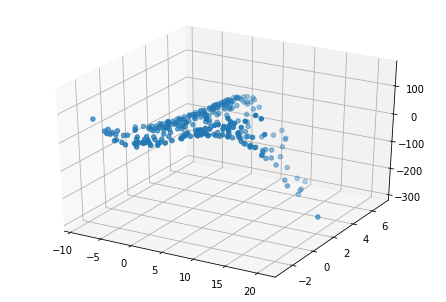

In [1468]:
# Ploting 3D scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1,x2,y)
plt.show()

### Discussion:
Now that looks like a surface, and clearly there is a relationship in data which we'll try to approximate with a polynomial regression, as it seems that the relationship is not linear

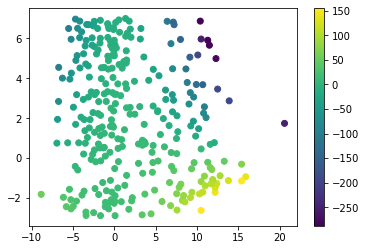

In [1469]:
## 2D scatter plot
fig, ax = plt.subplots()
scat = ax.scatter(x1, x2, c=y, marker='o')
fig.colorbar(scat)

plt.show();

#### Normalizing data

In [1470]:
# Normalize data
def norm_data(X,y):
    X_norm = (X - np.mean(X,axis=0)) / np.std(X, axis=0)
    y_norm = (y - np.mean(y))/np.std(y)
    return X_norm, y_norm
        
#X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

In [1471]:
X_norm, y_norm = norm_data(X,y)

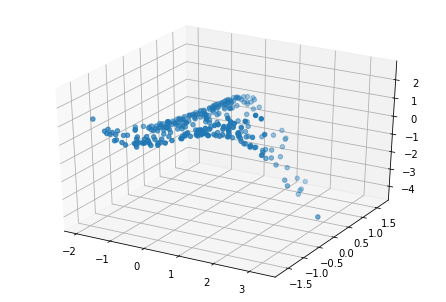

In [1472]:
# Ploting 3D scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_norm[:,0],X_norm[:,1],y_norm)
plt.show()

#### Preparing data

In [1290]:
def prepare_data(X,poly_n=3):
    '''Prepare the data by adding a bias vector (vector of ones) 
        and polynomials up to the order of poly_n'''
    X_poly = np.hstack((np.ones((X.shape[0], 1)), X))
    #print(X_poly.shape)
    n,k=X_poly.shape
    for i in range(2,poly_n+1):
        X_poly = np.hstack((X_poly,
                         (X_poly[:,1:k]**i).reshape(n,(k-1))
                           ))
        #print(X_poly.shape)
    #print(X_poly.shape)
    return X_poly

In [1123]:
#Inititialize coefficients
def init_coef(k):
    '''Given the number of variables, intitalized coefficients'''
    theta = np.zeros(k)
    return theta


In [1473]:
# Initialize target function:
def h(X,theta):
    return X @ theta
    

In [1125]:
# Define a cost funstion
def cost_func(X, y, theta):
    "Cost function"
    return np.mean(np.square(h(X, theta) - y))

In [1128]:
# Define gradient_descent with a certain learning rate eta

def grad_descent(X, y, theta, n_epochs=10000, eta=0.001):
    '''Gradient descent.
    Returns coefficients and losses'''
    n = X.shape[0]
    costs=[]
    for i in range(n_epochs):
        theta = theta - eta * (1/n) * (X.T @ ((X @ theta) - y))
        costs.append(cost_func(X, y, theta))
    return theta, costs
        


In [833]:
def r_squared(y,y_pred):
    '''Returns R^2'''
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_pred-y)**2)
    r_squared = 1-(ssr/sst)
    return(r_squared)

In [927]:
def rmse_metric(y, y_pred):
    '''Returns RMSE'''
    mean_error = np.mean(((y-y_pred)**2))
    return np.sqrt(mean_error)

In [1156]:
def ols(X_train, y_train, X_test, y_test, n_epochs=10000, eta=0.001):
    init_theta = init_coef(X_train.shape[1])
    theta, losses = grad_descent(X_train, y_train, init_theta, n_epochs, eta) 
    preds = h(X_test, theta)
    rmse = rmse_metric(y_test, preds)
    return theta, preds, rmse


In [1421]:
# Split a dataset into k folds
def cross_validation_split(X,y, n_folds):
    '''Cross validation split procedure
    Returns split for X and y'''
    X_split = list()
    y_split = list()
    X_copy = list(X.copy())
    y_copy = list(y.copy())
    fold_size = int(len(X) / n_folds)
    
    indices=np.arange(len(X))
    for i in range(n_folds-1):
        X_fold = list()
        y_fold = list()

        while len(X_fold) < fold_size:
            index = choice(indices)
            X_fold.append(X_copy.pop(index))
            y_fold.append(y_copy.pop(index))
            indices = np.arange(len(X_copy))
        X_split.append(np.array(X_fold))
        y_split.append(np.array(y_fold))
    last_X_fold = X_copy
    last_y_fold = np.array(y_copy)
    X_split.append(last_X_fold)
    y_split.append(last_y_fold)
    return X_split, y_split

In [1422]:
def least_squares_cv(X,y,n_folds=10, n_rounds = 5, params = {'n_epochs':[1000,5000,10000], 'eta':[0.001, 0.005, 0.01, 0.05]}):
    """OLS with n-fold cross validation. Returns coeffcients, predictions amnd RMSE and R^2 on the whole dataset"""

    X_split, y_split = cross_validation_split(X,y, n_folds)
    #predictions = []
    mean_rmse_scores = []
    _params = {'n_epochs':list(), 'eta':list()}
    for r in np.arange(n_rounds):
        n_epochs = choice(params["n_epochs"])
        eta = choice(params['eta'])
        _params['n_epochs'].append(n_epochs)
        _params['eta'].append(eta)
        scores = []
        for i in range(n_folds):
            #X_train = cv_split[:, :-1].remove(fold[:,:-1])
            X_train = np.array([item  for arr in (X_split[:i] + X_split[i+1 :]) for item in arr])
            y_train = np.array([item  for arr in (y_split[:i] + y_split[i+1:]) for item in arr])
            #print(X_train.shape)
            #print(y_train.shape)
            X_test = X_split[i]
            y_test = y_split[i]
            theta, preds, rmse = ols(X_train, y_train, X_test, y_test, n_epochs, eta) 
            scores.append(rmse)
        mean_rmse_scores.append(np.mean(np.array(scores)))
    
    best_mean_rmse = np.min(mean_rmse_scores)
    #print(mean_rmse_scores)
    p#rint(best_mean_rmse)
    best_n_epochs = _params['n_epochs'][np.argwhere(mean_rmse_scores == best_mean_rmse).item()]
    best_eta = _params['eta'][np.argwhere(mean_rmse_scores == best_mean_rmse).item()]
    
    theta_best, preds_best, rmse_all = ols(X, y, X, y, best_n_epochs, best_eta)
    r_sq = r_squared(y, preds_best)
    return theta_best, preds_best, rmse_all, r_sq
    
    

#### Polynom n=3

In [1452]:
# polynom=3
X_poly = prepare_data(X_norm, poly_n=3)

theta, preds, rmse_all, r_sq = least_squares_cv(X_poly,y)


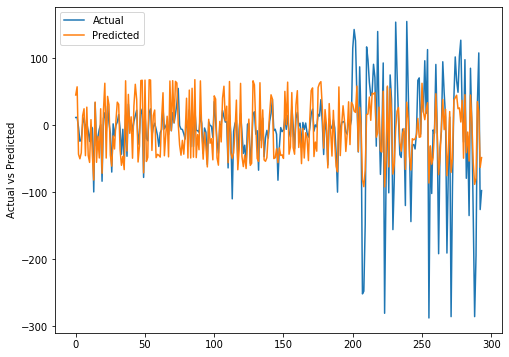

In [1453]:
fig = plt.figure(figsize=(8,6))

plt.plot(t, y, label='Actual')
plt.plot(t, preds, label='Predicted')
plt.ylabel("Actual vs Predicted")
plt.legend();

In [1446]:
print("RMSE: %.2f "%rmse_all)
print("R-squared: %.2f"%(r_sq*100),"%" )

RMSE: 48.12 
R-squared: 45.07 %


#### Polynom n=2

In [1454]:
# polynom=2
X_poly = prepare_data(X_norm, poly_n=2)

theta, preds, rmse_all, r_sq = least_squares_cv(X_poly,y)


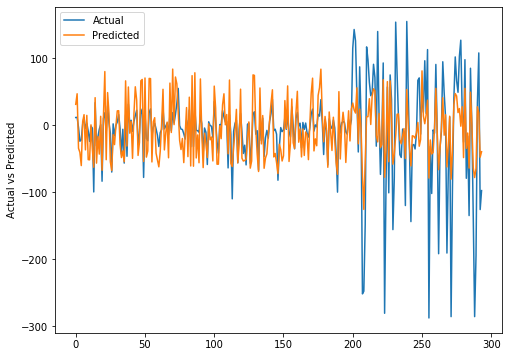

In [1455]:
fig = plt.figure(figsize=(8,6))

plt.plot(t, y, label='Actual')
plt.plot(t, preds, label='Predicted')
plt.ylabel("Actual vs Predicted")
plt.legend();

In [1456]:
print("RMSE: %.2f "%rmse_all)
print("R-squared: %.2f"%(r_sq*100),"%" )

RMSE: 49.00 
R-squared: 43.03 %
